<a href="https://colab.research.google.com/github/mriduldeka/MachineLearning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customerdata.csv to customerdata.csv


In [4]:
data = pd.read_csv('customerdata.csv')
data

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,F
1,CUSTID2,15000,18,79,F
2,CUSTID3,16000,23,8,M
3,CUSTID4,16000,25,79,M
4,CUSTID5,17000,32,41,M
...,...,...,...,...,...
195,CUSTID196,120000,36,79,M
196,CUSTID197,126000,46,32,M
197,CUSTID198,126000,29,72,F
198,CUSTID199,137000,32,22,F


In [5]:
data.columns

Index(['Cust_Number', 'Yearly_Income', 'Age', 'Cust_Spend_Score', 'Sex'], dtype='object')

In [6]:
dataf = data.drop(['Cust_Number'],axis=1)
dataf

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,F
1,15000,18,79,F
2,16000,23,8,M
3,16000,25,79,M
4,17000,32,41,M
...,...,...,...,...
195,120000,36,79,M
196,126000,46,32,M
197,126000,29,72,F
198,137000,32,22,F


In [7]:
final = dataf[['Yearly_Income','Cust_Spend_Score']]
final

,Yearly_Income,Cust_Spend_Score
0,15000,44
1,15000,79
2,16000,8
3,16000,79
4,17000,41
...,...,...
195,120000,79
196,126000,32
197,126000,72
198,137000,22


<Axes: xlabel='Yearly_Income', ylabel='Cust_Spend_Score'>

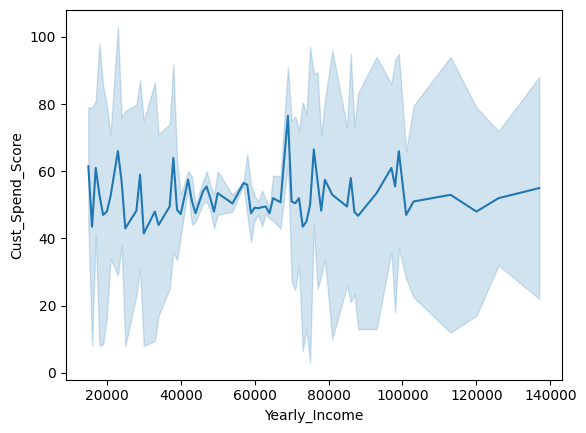

In [8]:
sns.lineplot(x=final['Yearly_Income'],y=final['Cust_Spend_Score'])

<Axes: xlabel='Yearly_Income', ylabel='Cust_Spend_Score'>

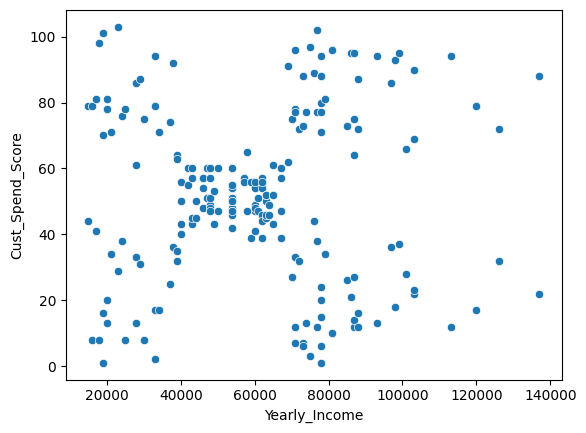

In [9]:
sns.scatterplot(x=final['Yearly_Income'],y=final['Cust_Spend_Score'])

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(final)
x
# For distance based algo, mandatory to do scaling

array([[-1.73899919, -0.28418148],
       [-1.73899919,  1.06356268],
       [-1.70082976, -1.67043263],
       [-1.70082976,  1.06356268],
       [-1.66266033, -0.39970241],
       [-1.66266033,  1.14057663],
       [-1.62449091, -1.67043263],
       [-1.62449091,  1.79519523],
       [-1.58632148, -1.93998146],
       [-1.58632148,  0.7169999 ],
       [-1.58632148, -1.36237682],
       [-1.58632148,  1.91071616],
       [-1.54815205, -1.20834891],
       [-1.54815205,  1.14057663],
       [-1.54815205, -1.47789774],
       [-1.54815205,  1.02505571],
       [-1.50998262, -0.66925125],
       [-1.50998262,  0.75550687],
       [-1.43364376, -0.86178613],
       [-1.43364376,  1.98773011],
       [-1.39547433, -0.51522334],
       [-1.39547433,  0.94804175],
       [-1.3573049 , -1.67043263],
       [-1.3573049 ,  1.02505571],
       [-1.24279661, -1.47789774],
       [-1.24279661,  1.33311151],
       [-1.24279661, -0.70775822],
       [-1.24279661,  0.37043711],
       [-1.20462718,

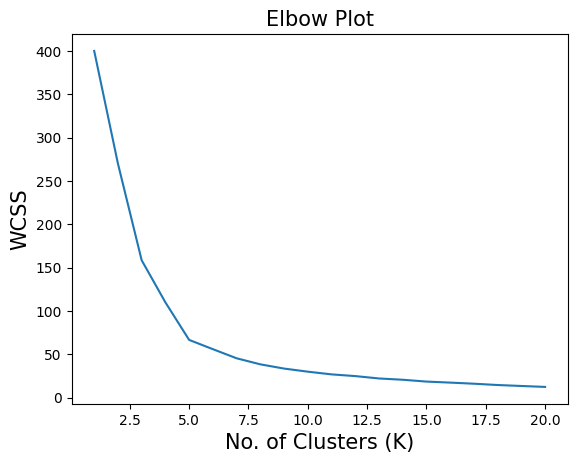

In [11]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of Clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()
x=sc.fit_transform(final)

In [13]:
#Build the model
newcluster = KMeans(n_clusters=5,random_state=10,init='k-means++')
newcluster.fit(x)

KMeans(n_clusters=5, random_state=10)

In [ ]:
newcluster.cluster_centers_

In [14]:
#silhoeutte score
from sklearn.metrics import silhouette_score,silhouette_samples
n_clusters = [2, 3, 4, 5, 6]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(x)
    score = silhouette_score(x, predict)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.2843143329836938)
For 3 clusters the silhouette score is 0.4655232553320422)
For 4 clusters the silhouette score is 0.4953283597895246)
For 5 clusters the silhouette score is 0.5520621436364275)
For 6 clusters the silhouette score is 0.5400545310397922)


In [15]:
#Final statistical inference
data["Clusters"] = newcluster.labels_

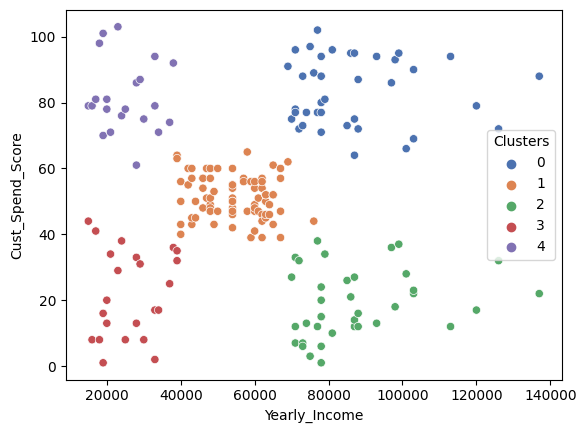

In [16]:
sns.scatterplot(x=data["Yearly_Income"],y=data["Cust_Spend_Score"],hue=data["Clusters"],palette="deep")
plt.show()

In [18]:
data["Clusters"].value_counts()

1    80
0    39
2    37
3    23
4    21
Name: Clusters, dtype: int64

In [19]:
data[data["Clusters"]==0].describe(include="all")
data[data["Clusters"]==1].describe(include="all")
data[data["Clusters"]==2].describe(include="all")
data[data["Clusters"]==3].describe(include="all")
data[data["Clusters"]==4].describe(include="all")

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex,Clusters
count,21,21.000000,21.00000,21.000000,21,21.0
unique,21,NaN,NaN,NaN,2,NaN
top,CUSTID2,NaN,NaN,NaN,M,NaN
freq,1,NaN,NaN,NaN,12,NaN
mean,NaN,25095.238095,25.00000,81.619048,NaN,4.0
std,NaN,7133.756107,5.51362,10.901726,NaN,0.0
min,NaN,15000.000000,18.00000,61.000000,NaN,4.0
25%,NaN,19000.000000,21.00000,75.000000,NaN,4.0
50%,NaN,24000.000000,24.00000,79.000000,NaN,4.0
75%,NaN,30000.000000,30.00000,87.000000,NaN,4.0


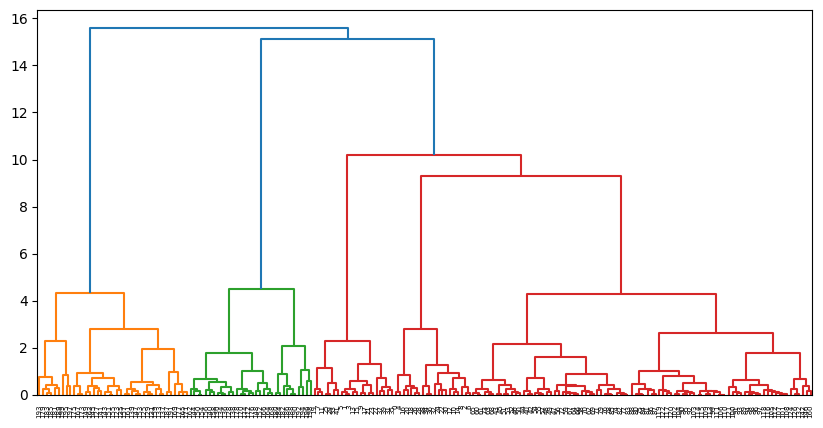

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,5))
dend=shc.dendrogram(shc.linkage(x,method="ward"))
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,silhouette_samples
n_clusters = [2, 3, 4, 5, 6]

In [ ]:
for K in n_clusters:
    clusterh = AgglomerativeClustering (n_clusters= K, linkage="ward")
    predicth = clusterh.fit_predict(x)
    score = silhouette_score(x, predicth)
    print ("For {} clusters the silhouette score is {})".format(K, score))
    

In [23]:
from sklearn.cluster import AgglomerativeClustering
aggmodel=AgglomerativeClustering(n_clusters=5,linkage="ward")
aggmodel.fit(x)

AgglomerativeClustering(n_clusters=5)

In [24]:
data["Clusterh"] = aggmodel.labels_
data

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex,Clusters,Clusterh
0,CUSTID1,15000,18,44,F,3,4
1,CUSTID2,15000,18,79,F,4,3
2,CUSTID3,16000,23,8,M,3,4
3,CUSTID4,16000,25,79,M,4,3
4,CUSTID5,17000,32,41,M,3,4
...,...,...,...,...,...,...,...
195,CUSTID196,120000,36,79,M,0,1
196,CUSTID197,126000,46,32,M,2,0
197,CUSTID198,126000,29,72,F,0,1
198,CUSTID199,137000,32,22,F,2,0
